# Приоритезация гипотез и анализ результатов А/В-теста

Данное исследование состоит из двух частей. 

Задача первой - приоритезация гипотез, призванных увеличить выручку интрнет-магазина, по двум методикам - ICE и RICE.

Задача второй - анализ результатов A/B-теста и принятие решение о продолжении теста или же его остановке. Предстоит проанализировать стабильность кумулятивных метрик, а также статистическую значимость различий в показателях среднего чека и среднего количества заказов на посетителя двух групп.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
# выгрузка данных для проверки гипотез

try:
    hypothesis = pd.read_csv('hypothesis.csv', sep=',')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

## Приоритезация гипотез

In [3]:
pd.set_option("max_colwidth", 100)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В данных нет пропусков, у всех гипотез есть необходимые оценки параметров.

### ICE

Приоритезируем гипотезы по методу ICE. 

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [5]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По показателю ICE, не учитывающему охват аудитории, лучший результат у гипотезы о запуске акции на скидку в день рождения клиента. Высокие показатели влияния на затронутых пользователей и уверенности в правильной оценке параметров, а также относительно небольшие усилия по реализации этой гипотезы делают ее несомненным лидером. Гипотеза о добавлении двух новых каналов трафика - на втором месте, за ней следует доьавление формы подписки на все основные страницы.

### RICE

Приоритезируем гипотезы по методу RICE. 

$$ICE = \frac{Reach * Impact * Confidence}{Efforts}$$

In [6]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
(hypothesis[['Hypothesis', 'RICE', 'ICE']]
 .sort_values(by='RICE', 
              ascending=False
             )
 .style.background_gradient(axis=0, 
                            cmap="RdYlGn",
                            subset=['ICE', 'RICE']
                           )
 .hide(axis='index')
)

Hypothesis,RICE,ICE
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,11.200000
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,7.000000
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,13.333333
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,8.000000
"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,1.125000
"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.000000
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,1.333333
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,1.000000


При приоритезации по методу RICE картина сильно изменилась. Гипотеза о запуске акции на скидку в день рождения переместилась в первой на пятую строчку из-за крайне низкого показателя охвата - всего 1 балл из 10. В то же время охват **гипотезы о добавлении формы подписки** на все основные страницы, которая позволит собрать данные для email-рассылок, составляет максимальные 10 баллов, поскольку затронет всех посетителей сайта. Вкупе с достаточно высокими показателями влияния и уверенности и относительно низкими требованиями к ресурсам вывели эту гипотезу на первое место с крупным отрывом.

На втором месте разместилась **гипотеза о добавлении блоков рекомендаций товаров**, которые позволят повысить конверсию и средний чек. Очевидно, эти блоки появятся не на всех страницах, поэтому оценка охвата составила 8 баллов. Параметр влияния весьма низкий - всего 3 балла, однако он компенсируется низкими затратами ресурсов на реализацию - также 3 балла. Вместе с тем у этой гипотезы относительно высокий показатель уверенности - 7 баллов. 

В обоих случаях аутсайдером стала гипотеза об изменении цвета фона главной страницы - все показатели крайне низки, поэтому даже малые затраты ресурсов на реазизацию не повлияли на ее приоритезацию.

In [7]:
def split(string, sep, pos):
    string = string.split(sep)
    return sep.join(string[:pos]), sep.join(string[pos:])

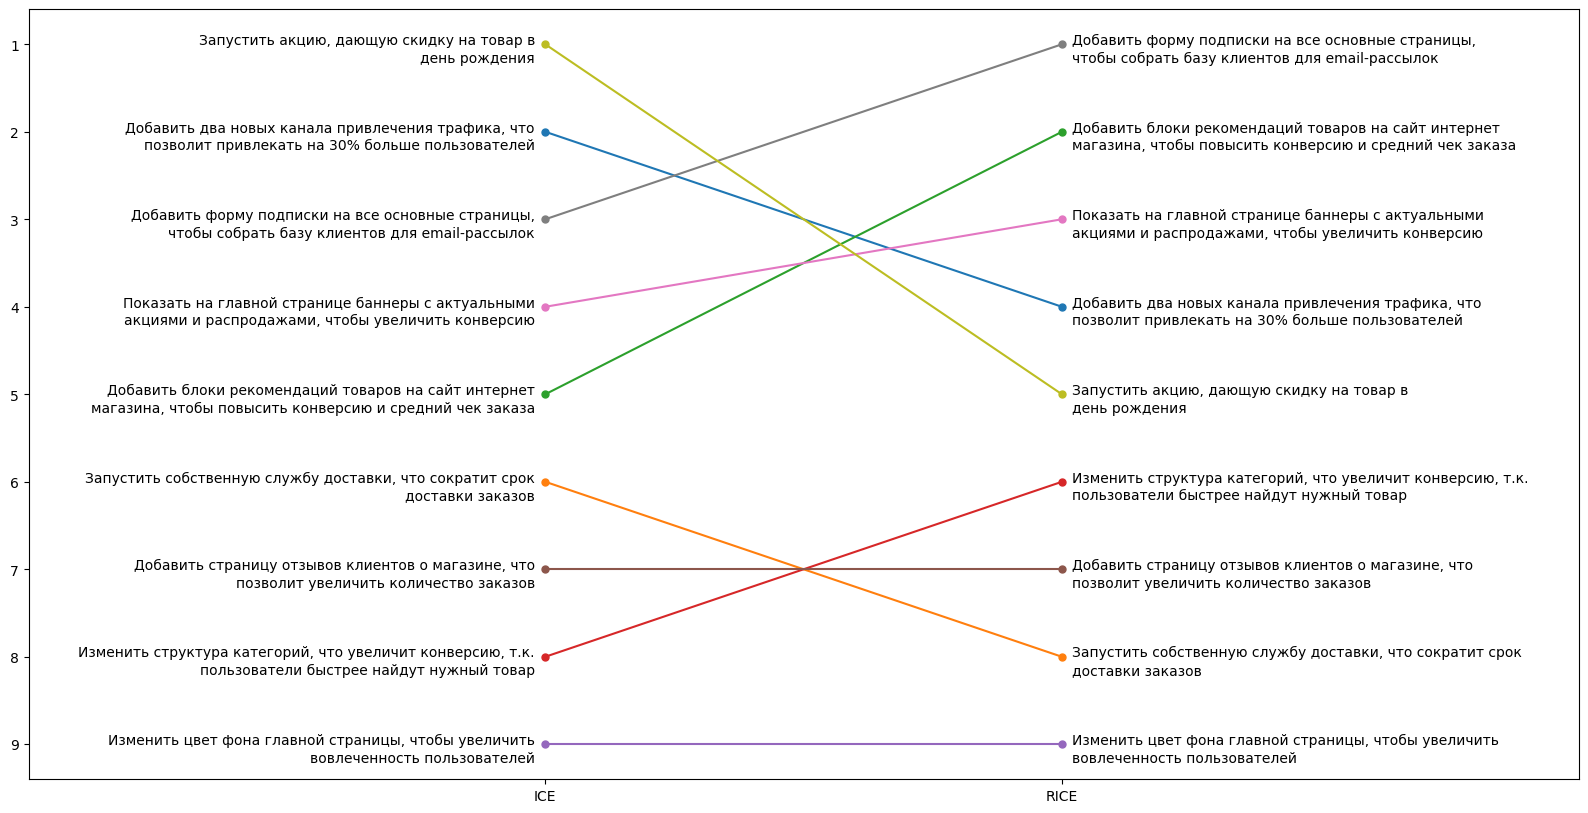

In [8]:
hypothesis['ICE_rank'] = hypothesis['ICE'].rank(method='first')
hypothesis['RICE_rank'] = hypothesis['RICE'].rank(method='first')

fig, ax = plt.subplots(1, figsize=(20,10))

for i in hypothesis['Hypothesis']:
    values = hypothesis[hypothesis['Hypothesis']==i]
    plt.plot([1, 2], [values.ICE_rank, values.RICE_rank], marker='o', markersize=5)
    plt.text(0.98, values.ICE_rank, split(i, ' ', 7)[0], ha='right')
    plt.text(0.98, values.ICE_rank-0.2, split(i, ' ', 7)[1], ha='right')
    plt.text(2.02, values.RICE_rank, split(i, ' ', 7)[0])
    plt.text(2.02, values.RICE_rank-0.2, split(i, ' ', 7)[1])
plt.xticks([1,2],['ICE', 'RICE'])
plt.yticks([x for x in range(1,10)], [x for x in range(9,0,-1)])
plt.xlim(0,3)
plt.show()
    

### Вывод

В данном случае предпочтительнее использовать метод RICE, поскольку охват - важный параметр для интернет-магазина. В связи с этим **первой стоит проверить гипотезу о добавлении формы подписки на все основные страницы сайта**.

## Анализ результатов A/B-теста

In [9]:
# выгрузка результатов теста

try:
    orders = pd.read_csv('orders.csv', sep=',')
    visitors = pd.read_csv('visitors.csv', sep=',')
except:
    hypothesis = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

### Проверка качества данных

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

В данных нет пропусков и явных дубликатов.

In [14]:
# приводим даты к формату datetime

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
orders.rename(columns={'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'}, inplace=True);

In [16]:
# проверим размеры групп

visitors[visitors['group'] == 'A'].count()

date        31
group       31
visitors    31
dtype: int64

In [17]:
visitors[visitors['group'] == 'B'].count()

date        31
group       31
visitors    31
dtype: int64

In [18]:
display(visitors['date'].min())
visitors['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

В данных есть информация о посещениях за 31-дневный период (c 1 по 31 августа). Для обеих групп есть информация о всех днях данного периода.

In [19]:
visitors[visitors['group'] == 'A']['visitors'].sum()

18736

In [20]:
visitors[visitors['group'] == 'B']['visitors'].sum()

18916

Посетители интернет-магазина распределялись по группа достаточно равномерно.

In [21]:
orders[orders['group'] == 'A']['visitor_id'].isin(orders[orders['group'] == 'B']['visitor_id']).sum()

89

В данных есть пользователи, которые попали в обе группы, что противоречит условиям проведения A/B-теста. Удалим этих пользователей и данные об их заказах, поскольку они могут исказить результаты исследования.

In [22]:
duplicate_visitors = orders.groupby('visitor_id').agg({'group': 'count'}).reset_index()
duplicate_visitors = duplicate_visitors[duplicate_visitors['group'] == 2]['visitor_id']
orders = orders.query('visitor_id not in @duplicate_visitors', engine='python')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1069 non-null   int64         
 1   visitor_id      1069 non-null   int64         
 2   date            1069 non-null   datetime64[ns]
 3   revenue         1069 non-null   int64         
 4   group           1069 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 50.1+ KB


Количество транзакций сократилось чуть более чем на 10%, однако оставшихся данных должно быть достаточно для проведения анализа.

### Анализ метрик

In [23]:
# получаем пары "дата-группа"

cumulative_data = orders[['date', 'group']].drop_duplicates()

# собираем кумулятивные метрики

cumulative_data = (cumulative_data
                   .apply(lambda x: orders[np.logical_and(orders['group'] == x['group'], 
                                                          orders['date'] <= x['date']
                                                         )
                                          ]
                          .agg({'date': 'max', 
                                'group': 'max',
                                'transaction_id': 'nunique',
                                'visitor_id': 'nunique',
                                'revenue': 'sum'
                               }
                              ),
                          axis=1
                         )
                   .sort_values(by=['date', 'group'])
                   .reset_index(drop=True)
                  )

cumulative_data.columns=['date', 'group', 'orders', 'buyers', 'revenue']

# добавляем столбец с кумулятивным количеством посетителей по дням

cumulative_visitors = visitors[['date', 'group']].drop_duplicates()
cumulative_visitors = (cumulative_visitors
                       .apply(lambda x: visitors[np.logical_and(visitors['group'] == x['group'], 
                                                                visitors['date'] <= x['date']
                                                               )
                                                ]
                              .agg({'date': 'max', 
                                    'group': 'max',
                                    'visitors': 'sum'
                                   }
                                  ),
                              axis=1
                             )
                   .sort_values(by=['date', 'group'])
                   .reset_index(drop=True)
                  )

cumulative_data = cumulative_data.merge(cumulative_visitors, left_on=['date', 'group'], right_on=['date', 'group'], how='left')

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,21,18,126097,719
1,2019-08-01,B,19,18,82717,713
2,2019-08-02,A,37,33,174270,1338
3,2019-08-02,B,40,39,239878,1294
4,2019-08-03,A,61,57,286743,1845


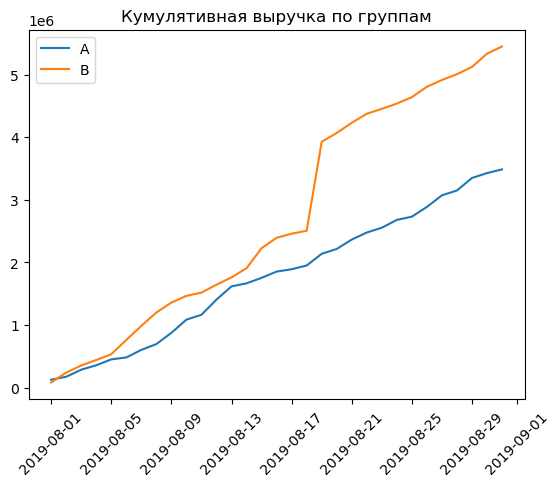

In [24]:
# получаем данные по группам для графиков
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'orders', 'revenue']]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'orders', 'revenue']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Общая выручка показывает рост в обеих группах. В группе В она стабильно выше, однако 18 августа в этой группе зарегистрирован резкий рост, который может быть связан с аномально крупной покупкой.

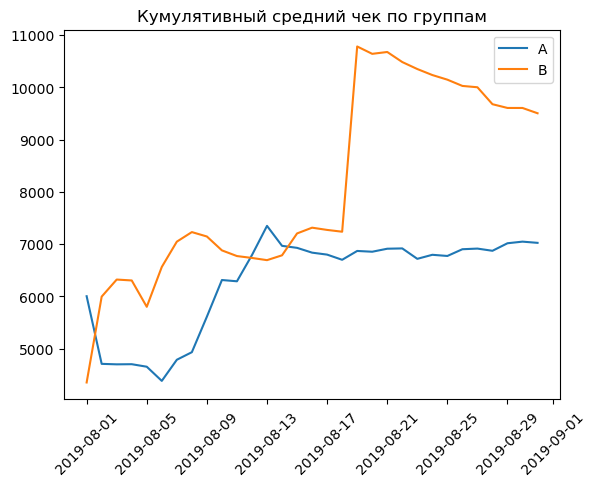

In [25]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Показатель кумулятивного среднего чека для группы А стабилизировался в районе 7000, в то время как в группе В 18 августа ожидаемо заметен аномально резкий рост среднего чека (как и в случае с кумулятивной выручкой). Очевидно, этот выброс не позволил группе В стабилизироваться. Вероятно, удаление аномально крупных покупок позволит более качественно оценить реальную ситуацию - скорее всего, показатели группы В действительно лучше, однако не столь значительно.

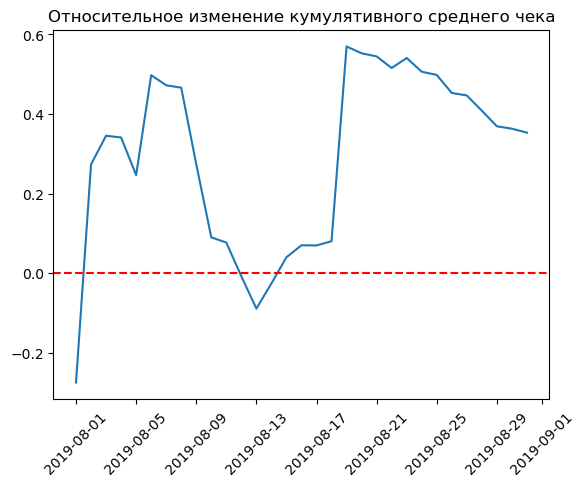

In [26]:
cumulative_revenue_merged = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

plt.plot(cumulative_revenue_merged['date'], (cumulative_revenue_merged['revenue_b']/cumulative_revenue_merged['orders_b'])/(cumulative_revenue_merged['revenue_a']/cumulative_revenue_merged['orders_a'])-1)
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle='--', color = 'red')
plt.show()

Для графика характерны сильные перепады, которые, вероятно, связаны с крупными покупками. По "сырым" данным говорить о стабилизации данной кумулятивной метрики нельзя.

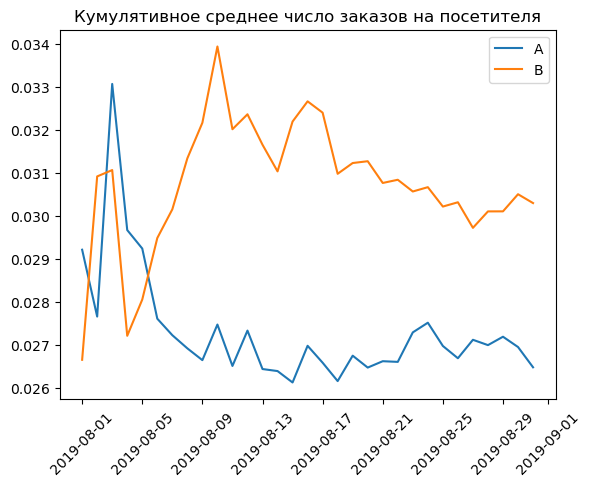

In [27]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.title('Кумулятивное среднее число заказов на посетителя')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

По показателю кумулятивной конверсии группа В в течение практически всего периода была лучше группы А. В то же время группа В показывает тенденцию к снижению конверсии, в то время как группа А стабилизировалась и находится в диапазоне 2.6 - 2.8%. В то же время мы не видим пика 18 августа - это позволяет предположить, что резкий скачок кумулятивной выручки вызван 1-2 крупными заказами, а не аномальным наплывом покупателей или же одним покупателем, совершившим большое количество покупок, в группе В.

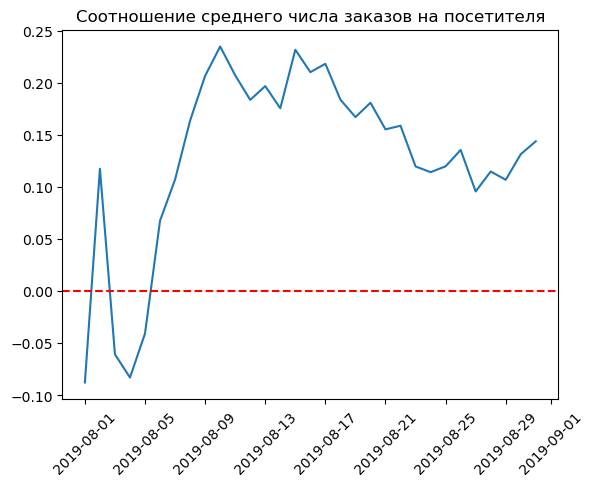

In [28]:
cumulative_data_merged = cumulative_data_a.merge(cumulative_data_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

plt.plot(cumulative_data_merged['date'], cumulative_data_merged['conversion_b']/cumulative_data_merged['conversion_a'] - 1)
plt.title('Соотношение среднего числа заказов на посетителя')
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle='--', color = 'red')
plt.show()

По показателю кумулятивной конверсии группа В лучше группы А на 10-15%. В то же время это соотношение имеет тенденцию к снижению, и пока что рано говорить о стабилизации этой кумулятивной метрики.

Text(0.5, 1.0, 'Количество заказов на одного покупателя')

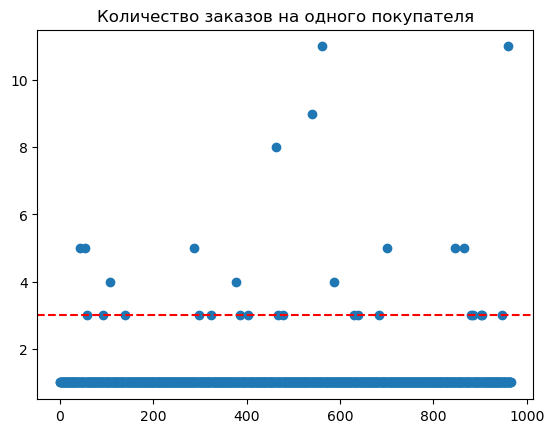

In [45]:
orders_per_buyer = orders.groupby('visitor_id').agg({'transaction_id': 'count', 'group': 'max'}).reset_index()
orders_per_buyer.columns=['visitor_id', 'orders', 'group']
x_values = range(0, len(orders_per_buyer['visitor_id']))
plt.scatter(x_values, orders_per_buyer['orders'])
plt.axhline(y=3, linestyle='--', color='red')
plt.title('Количество заказов на одного покупателя')

Большинство покупателей делали не более одного заказа. Случаи, когда совершалось более 5 заказов, совсем редки. Примечально, что в выборке нет покупателей, сделавших два заказа - это не невозможно, тем более что процент покупателей, которые в принципе совершили более 1 покупки, весьма мал, однако не будет лишним перепроверить техническую часть теста (тем более что встречались пользователи, которые попали сразу в обе группы).

In [30]:
np.percentile(orders_per_buyer['orders'], [90, 95, 98, 99])

array([1.  , 1.  , 3.  , 4.34])

98% покупателей совершали не более 3 покупок - возьмем это число для отсеивания аномальных значений. 

Text(0.5, 1.0, 'Сумма чека')

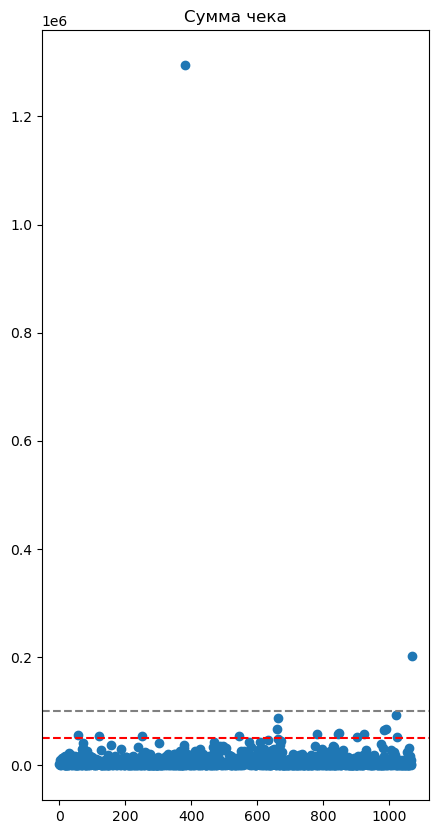

In [44]:
x_values = range(0, len(orders['transaction_id']))
plt.figure(figsize=(5,10))
plt.scatter(x_values, orders['revenue'])
plt.axhline(y=100000, linestyle='--', color='grey')
plt.axhline(y=50000, linestyle='--', color='red')
plt.title('Сумма чека')

Сумма большинства заказов не превышает 50 тыс., и лишь пара заказов превысили отметку 100 тыс. Однако есть один заказ на сумму свыше одного миллиона - вероятно, он был сделан 18 августа в группе В.

In [32]:
np.percentile(orders['revenue'], [90, 95, 98, 99])

array([18286. , 27831. , 43348. , 57152.4])

In [47]:
round(st.percentileofscore(orders['revenue'], 50000),2)

98.41

Более 98% заказов по сумме не превышают 50 тыс. - возьмем эту цифру для отсеивания аномально больших значений.

In [33]:
abnormal_users = pd.concat([orders_per_buyer[orders_per_buyer['orders'] > 3]['visitor_id'],
                            orders[orders['revenue'] > 50000]['visitor_id']
                           ],
                           axis=0
                          ).drop_duplicates()
abnormal_users.count()

27

Мы отсеяли в общей сложности 27 покупателей, которые совершали покупки на сумму свыше 50 тыс. и/или совершали более 3 покупок.

In [49]:
# формируем выборки для теста Манна-Уитни
# берем для каждой группы количество заказов на пользователя, для всех остальных пользователей ставим количество заказов, равное 0

visitors_a = visitors[visitors['group']=='A']
visitors_b = visitors[visitors['group']=='B']

orders_sample_a = pd.concat([orders_per_buyer[orders_per_buyer['group']=='A']['orders'],
                             pd.Series(0,
                                       np.arange(visitors_a['visitors'].sum() - len(orders_per_buyer[orders_per_buyer['group']=='A']['orders'])),
                                       name='orders'
                                      )
                            ],
                            axis=0
                           )
                            

orders_sample_b = pd.concat([orders_per_buyer[orders_per_buyer['group']=='B']['orders'],
                             pd.Series(0,
                                       np.arange(visitors_b['visitors'].sum() - len(orders_per_buyer[orders_per_buyer['group']=='B']['orders'])),
                                       name='orders'
                                      )
                            ],
                            axis=0
                           )

Проверим получившиеся выборки на нормальность распределения тестом Шапиро-Уилка.

In [52]:
display(st.shapiro(orders_sample_a)[1])
st.shapiro(orders_sample_b)[1]

0.0

0.0

В обоих случаях распределение не нормальное, поэтому для сравнения выборок будем использовать тест Манна-Уитни.

* **Нулевая гипотеза: между выборками нет статистически значимых различий**
* **Альтернативная гипотеза: между выборками есть статистически значимые различия**

Пороговым значением p-value выберем 0.01.

In [63]:
print('{0:.5f}'.format(st.mannwhitneyu(orders_sample_a, orders_sample_b, alternative='two-sided')[1]))
print('{0:.3f}'.format(orders_sample_b.mean() / orders_sample_a.mean() - 1))

0.00129
0.405


По "сырым" данным мы видим, что количество заказов на одного посетителя в группе В значительно выше, чем в группе А - среднее значение выше на 40%. Кроме того, тест Манна-Уитни показывает статистически значимое различие выборок, даже если принять пороговое значение p-value в 1%. Мы можем отвергнуть нулевую теорию об отсутствии различий между выборками и принять альтернативную теорию о том, что между выборками есть статистически значимые различия.

Проверим те же нулевую и альтернативную гипотезы по "очищенным" данным.

In [58]:
orders_sample_a_filtered = pd.concat([orders_per_buyer[np.logical_and(orders_per_buyer['group']=='A',
                                                                      np.logical_not(orders_per_buyer['visitor_id'].isin(abnormal_users))
                                                                     )
                                                      ]['orders'],
                                      pd.Series(0,
                                                np.arange(visitors_a['visitors'].sum() - len(orders_per_buyer[orders_per_buyer['group']=='A']['orders'])),
                                                name='orders'
                                               )
                                     ],
                                     axis=0
                                    )
                            

orders_sample_b_filtered = pd.concat([orders_per_buyer[np.logical_and(orders_per_buyer['group']=='B',
                                                                      np.logical_not(orders_per_buyer['visitor_id'].isin(abnormal_users))
                                                                     )
                                                      ]['orders'],
                                      pd.Series(0,
                                                np.arange(visitors_b['visitors'].sum() - len(orders_per_buyer[orders_per_buyer['group']=='B']['orders'])),
                                                name='orders'
                                               )
                                     ],
                                     axis=0
                                    )

print('{0:.5f}'.format(st.mannwhitneyu(orders_sample_a_filtered, orders_sample_b_filtered, alternative='two-sided')[1]))
print('{0:.3f}'.format(orders_sample_b_filtered.mean() / orders_sample_a_filtered.mean() - 1))

0.00369
0.233


По "очищенным" данным соотношение все также в пользу группы В, хоть и чуть менее значительно (в среднем количество заказов выше на 23%). При этом между выборками сохраняется статистически значимое различие, поэтому и по "очищенным" данным мы можем отвергнуть нулевую теорию об отсутствии различий между выборками.

In [54]:
avg_order_a = orders[orders['group']=='A']['revenue']
avg_order_b = orders[orders['group']=='B']['revenue']

Проверим выборки среднего чека на нормальность распределения тестом Шапиро-Уилка.

In [55]:
display(st.shapiro(avg_order_a)[1])
st.shapiro(avg_order_b)[1]

3.169971485036199e-32

1.401298464324817e-45

В данном случае также видно, что распределение далеко от нормального, поэтому для проверки гипотез будем использовать тест Манна-Уитни.

* **Нулевая гипотеза: между выборками нет статистически значимых различий**
* **Альтернативная гипотеза: между выборками есть статистически значимые различия**

In [56]:
print('{0:.5f}'.format(st.mannwhitneyu(avg_order_a, avg_order_b, alternative='two-sided')[1]))
print('{0:.3f}'.format(avg_order_b.mean() / avg_order_a.mean() - 1))

0.52034
0.353


По "сырым" данным средний показатель чека различается на 35% в пользу группы В. Тем не менее, отклонить нулевую гипотезу о том, что между двумя группами по этому показателю есть статистически значимое различие, мы не можем. 

Проверим те же нулевую и альтернативную гипотезы по "очищенным" данным.

In [57]:
avg_order_a_filtered = orders[np.logical_and(orders['group']=='A',
                                             np.logical_not(orders['visitor_id'].isin(abnormal_users))
                                            )
                             ]['revenue']

avg_order_b_filtered = orders[np.logical_and(orders['group']=='B',
                                             np.logical_not(orders['visitor_id'].isin(abnormal_users))
                                            )
                             ]['revenue']

print('{0:.5f}'.format(st.mannwhitneyu(avg_order_a_filtered, avg_order_b_filtered, alternative='two-sided')[1]))
print('{0:.3f}'.format(avg_order_b_filtered.mean() / avg_order_a_filtered.mean() - 1))

0.88452
0.028


По очищенным данным ситуация сильно изменилась: у нас еще меньше оснований отклонить нулевую гипотезу о том, что между группами есть различия, поскольку p-value еще сильнее приблизился к 1, однако средний показатель чека теперь отличается всего на 3%, а не на 35, как это было раньше.

Вернемся к кумулятивным метрикам и посмотрим, как изменятся графики соотношения групп, если исключить "аномальных" пользователей.

In [38]:
orders_filtered = orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]

cumulative_data_filtered = orders_filtered[['date', 'group']].drop_duplicates()

cumulative_data_filtered = (cumulative_data_filtered
                            .apply(lambda x: orders_filtered[np.logical_and(orders_filtered['group'] == x['group'], 
                                                                            orders_filtered['date'] <= x['date']
                                                                           )
                                                   ]
                                   .agg({'date': 'max', 
                                         'group': 'max',
                                         'transaction_id': 'nunique',
                                         'visitor_id': 'nunique',
                                         'revenue': 'sum'
                                        }
                                       ),
                                   axis=1
                                  )
                          .sort_values(by=['date', 'group'])
                          .reset_index(drop=True)
                         )

cumulative_data_filtered.columns=['date', 'group', 'orders', 'buyers', 'revenue']

cumulative_data_filtered = cumulative_data_filtered.merge(cumulative_visitors, left_on=['date', 'group'], right_on=['date', 'group'], how='left')
cumulative_data_filtered['conversion'] = cumulative_data_filtered['orders'] / cumulative_data_filtered['visitors']

In [39]:
cumulative_data_a_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='A']
cumulative_data_b_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='B']

cumulative_data_merged_filtered = cumulative_data_a_filtered.merge(cumulative_data_b_filtered, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

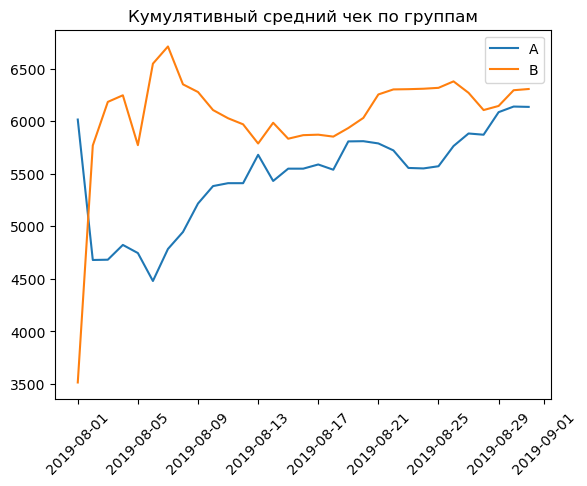

In [40]:
plt.plot(cumulative_data_a_filtered['date'], cumulative_data_a_filtered['revenue']/cumulative_data_a_filtered['orders'], label='A')
plt.plot(cumulative_data_b_filtered['date'], cumulative_data_b_filtered['revenue']/cumulative_data_b_filtered['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

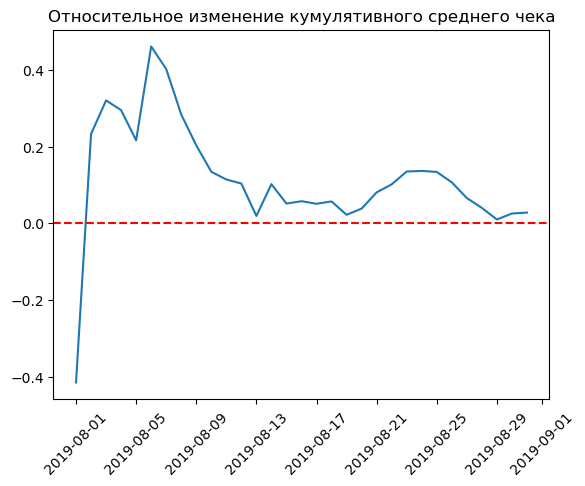

In [41]:
plt.plot(cumulative_data_merged_filtered['date'], (cumulative_data_merged_filtered['revenue_b']/cumulative_data_merged_filtered['orders_b'])/(cumulative_data_merged_filtered['revenue_a']/cumulative_data_merged_filtered['orders_a'])-1)
plt.title('Относительное изменение кумулятивного среднего чека')
plt.axhline(y=0, linestyle='--', color = 'red')
plt.xticks(rotation = 45)
plt.show()

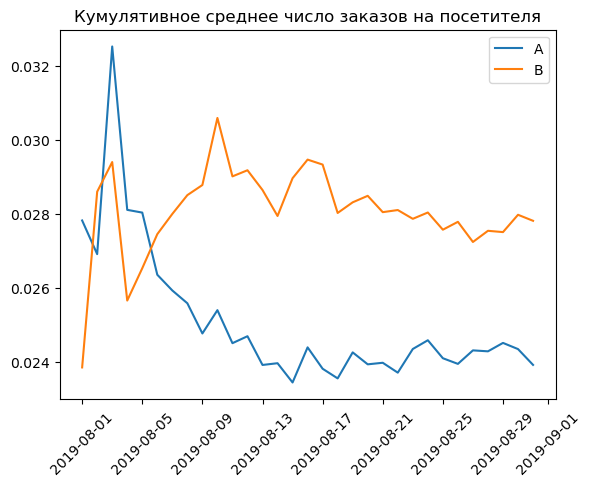

In [42]:
plt.plot(cumulative_data_a_filtered['date'], cumulative_data_a_filtered['conversion'], label='A')
plt.plot(cumulative_data_b_filtered['date'], cumulative_data_b_filtered['conversion'], label='B')
plt.title('Кумулятивное среднее число заказов на посетителя')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

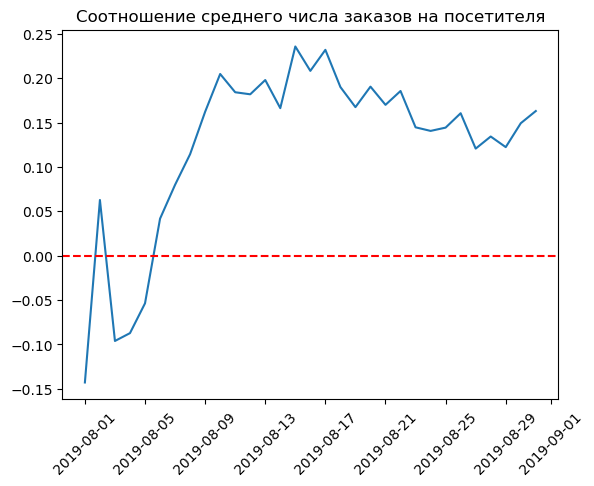

In [43]:
plt.plot(cumulative_data_merged_filtered['date'], cumulative_data_merged_filtered['conversion_b']/cumulative_data_merged_filtered['conversion_a'] - 1)
plt.title('Соотношение среднего числа заказов на посетителя')
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle='--', color = 'red')
plt.show()

## Выводы

В ходе исследования мы провели приоритезацию гипотез и анализ результатов A/B-теста. 

При приоритезации гипотез использовались методики ICE и RICE. По методике ICE наибольший приоритет получила гипотеза о запуске акции на скидку в день рождения, по методике RICE - гипотеза о добавлении формы подписки на все основные страницы. 

Поскольку параметр охвата играет важную роль для интернет-магазина, предпочтительнее использовать методику RICE, поэтому **гипотезу о добавлении формы подписки на все основные страницы стоит проверить в первую очередь**.

При проверке A/B-теста были проанализированы кумулятивные метрики:
* средний чек;
* среднее число заказов на посетителя.

В ходе исследования мы исключили покупателей с количеством заказов более 3 и суммой покупки свыше 50 тыс. (в обоих случаях представители этих категорий составляли менее 2% от общего числа покупателей и их можн считать аномалиями). 

По результатам исследований:
* кумулятивные метрики среднего чека не успели полностью стабилизироваться, однако в течение рассматриваемого периода эти метрики для обеих групп постепенно сближаются и сейчас находятся на приблизительно одном уровне;
* результат теста Манна-Уитни не дает нам возможности отвергнуть нулевую гипотезу о том, что выборки А и В статистически различаются;
* в среднем чек группы В больше чека группы А всего на 2%;
* кумулятивные метрики количества заказов на одного посетителя стабилизировались;
* количество заказов на одного посетителя в группе В выше, чем в группе А, при этом различия статистически значимы при допустимой погрешности в 1%;
* в среднем в группе В на 23% больше заказов на одного посетителя, чем в группе А.

При большем количестве заказов на посетителя и одинаковом среднем чеке группа В показывает лучшие показатели выручки, чем группа А. 
Сближение кумулятивных метрик среднего чека позволяет с высокой долей уверенности говорить о том, что и в дальнейшем показатель среднего чека не будет статистически отличаться между группами А и В. 

В связи с этим **рекомендуется остановить тест и признать его успешным**: группа В лучше группы А по показателю среднего количества заказов на одного посетителя.